<a href="https://colab.research.google.com/github/agamsaikumar10/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

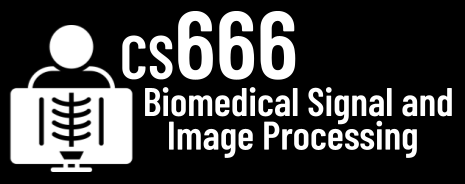

# Assignment 1

In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [47]:
!pip install biosppy

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [49]:
from biosppy import storage
signal, metadata = storage.load_txt('/content/drive/MyDrive/ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [50]:

SAMPLING_RATE = metadata['sampling_rate']
SECONDS = len(signal) / SAMPLING_RATE

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [51]:
from biosppy import signals
out = signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

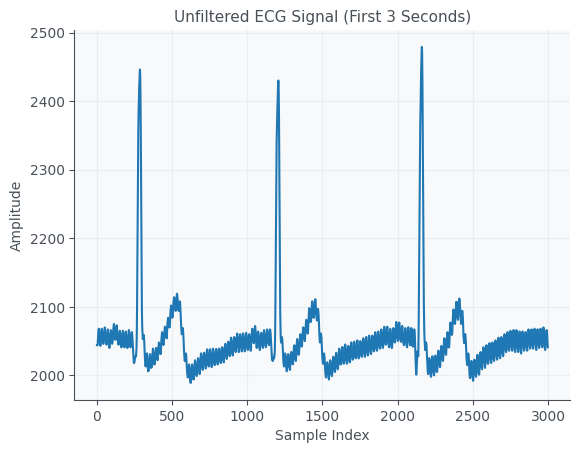

In [52]:
### TODO plot unfiltered signal
import matplotlib.pyplot as plt

# Get the first 3 seconds of the signal
signal_3sec = signal[:int(3 * SAMPLING_RATE)]

# Plot the first 3 seconds of the unfiltered signal
plt.figure()
plt.plot(signal_3sec)
plt.title('Unfiltered ECG Signal (First 3 Seconds)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

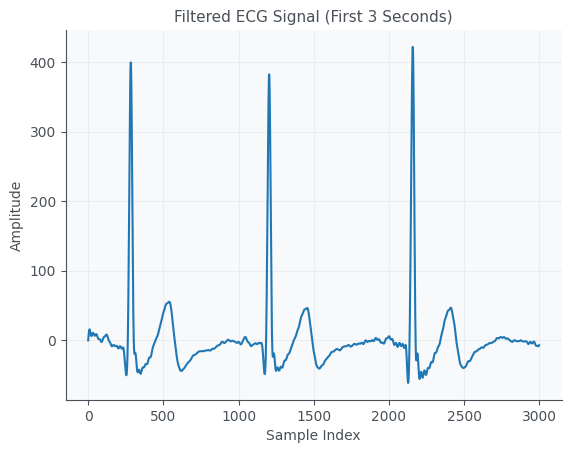

In [53]:
### TODO plot filtered signal
plt.figure()
plt.plot(out['filtered'][:int(3 * SAMPLING_RATE)])
plt.title('Filtered ECG Signal (First 3 Seconds)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

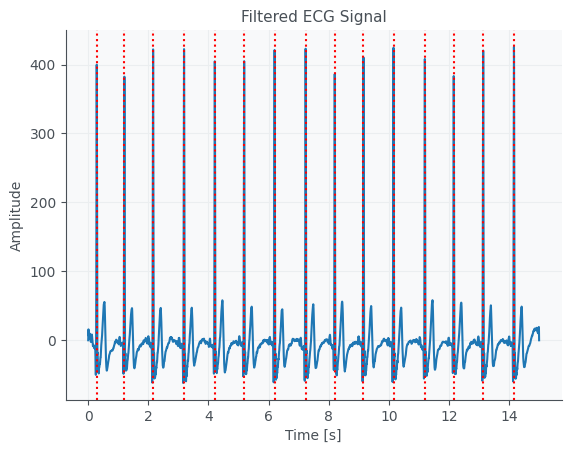

In [54]:
### TODO
# Get the time values for the samples
time = [i/SAMPLING_RATE for i in range(len(signal))]

# Plot the filtered signal
plt.figure()
plt.plot(time, out['filtered'])
plt.title('Filtered ECG Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot vertical lines at the R-peak locations
for r_peak in out['rpeaks']:
    plt.axvline(x=r_peak/SAMPLING_RATE, color='r', ls=':')

plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [55]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

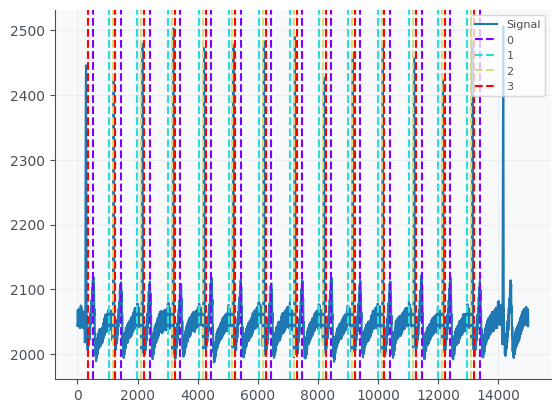

In [56]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
_, waves_peak = nk.ecg_delineate(signal, out['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:],
                       waves_peak['ECG_P_Peaks'][:],
                       waves_peak['ECG_Q_Peaks'][:],
                       waves_peak['ECG_S_Peaks'][:]], signal)

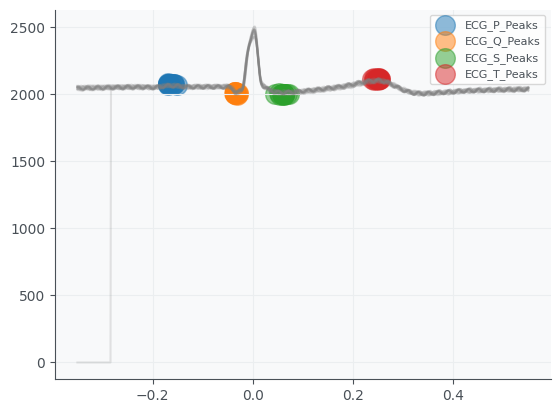

In [57]:
# TODO Does the detection work well?
import warnings
warnings.filterwarnings('ignore')
_, waves_peak = nk.ecg_delineate(signal,
                                 out['rpeaks'],
                                 sampling_rate=SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [68]:
!pip install sleepecg

In [69]:
import sleepecg
import numpy as np

# Assuming `ecg_data` contains your ECG signal and `sampling_frequency` is defined

# Use sleepecg to detect R peaks
r_peaks, = sleepecg.detect_rpeaks(
    ecg=ecg_data,
    fs=sampling_frequency,
    rpeak_search_radius=50,
)

# `r_peaks` now contains the indices of R peaks within `ecg_data`

AttributeError: module 'sleepecg' has no attribute 'detect_rpeaks'

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

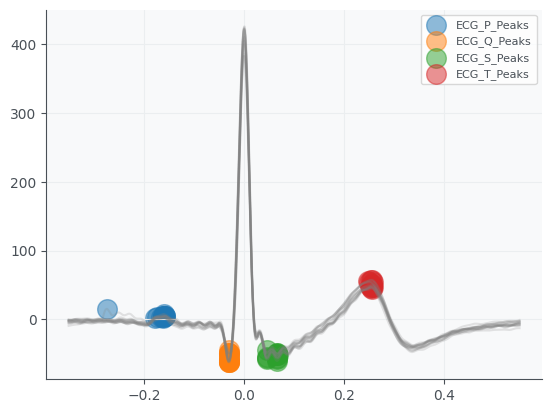

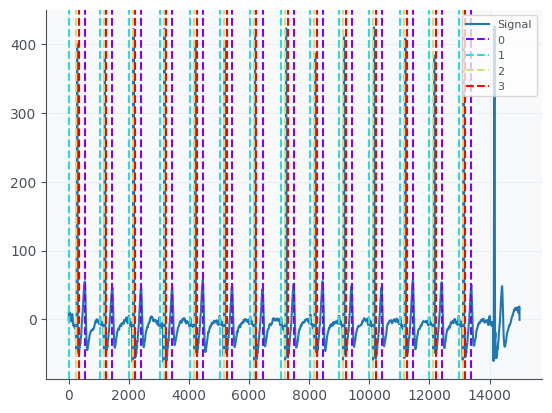

In [72]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
signal_filtered = out['filtered']
_, peaks_filtered = nk.ecg_delineate(signal_filtered, out['rpeaks'], sampling_rate=SAMPLING_RATE, method='peak', show_type='peaks', show=True)

plot = nk.events_plot([peaks_filtered['ECG_T_Peaks'][:],
                       peaks_filtered['ECG_P_Peaks'][:],
                       peaks_filtered['ECG_Q_Peaks'][:],
                       peaks_filtered['ECG_S_Peaks'][:]], signal_filtered)

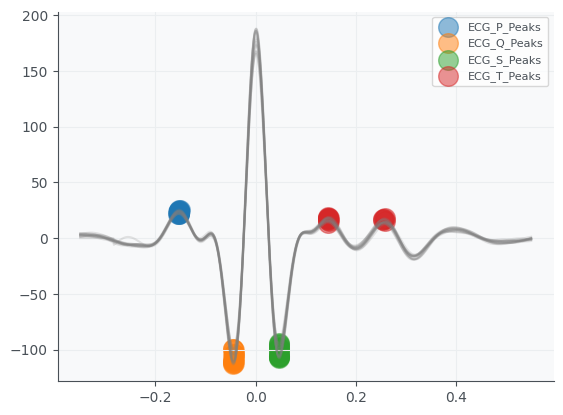

In [73]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
import neurokit2 as nk
import numpy as np
rpeaks = out["rpeaks"]

# Filter the signal
lowcut = 5
highcut = 15
signal_filtered = nk.signal_filter(signal, lowcut=lowcut, highcut=highcut, sampling_rate=SAMPLING_RATE, order=3)

# Detect P Q S T peaks for filtered signal
_, peaks_filtered = nk.ecg_delineate(signal_filtered, rpeaks, sampling_rate=SAMPLING_RATE, method='peak', show=True)

In [74]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [75]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [76]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [77]:
# TODO Which one works the best?

In [80]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#